In [1]:
!pip install spacy
!pip install transformers
!pip install torch  # Needed for transformers
!python -m spacy download en_core_web_sm  # Small Spacy model for English language

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import pandas as pd

# Load the data
data = pd.read_csv('google_reviews.csv')

# Handle missing values in the 'description' column
data['description'] = data['description'].fillna('')
print("Initial Data Sample:")
print(data[['description']].head(), "\n")  # Print initial sample


Initial Data Sample:
                                         description
0  I have invited a 3 friends for the dinner.\nTh...
1  Pleased to see a Mangalorean restaurant finall...
2  Good service.   Fish a bit too spicy and lassi...
3  Nothing quite satisfies your taste buds like a...
4  My uncle called me up, excited to tell me abou... 



In [5]:
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text)  # Tokenization
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(processed_tokens)

# Apply preprocessing
data['cleaned_description'] = data['description'].apply(preprocess_text)
print("Data after Cleaning and Tokenization:")
print(data[['description', 'cleaned_description']].head(), "\n")  # Print cleaned sample


Data after Cleaning and Tokenization:
                                         description  \
0  I have invited a 3 friends for the dinner.\nTh...   
1  Pleased to see a Mangalorean restaurant finall...   
2  Good service.   Fish a bit too spicy and lassi...   
3  Nothing quite satisfies your taste buds like a...   
4  My uncle called me up, excited to tell me abou...   

                                 cleaned_description  
0  invited friend dinner service fantastic food t...  
1  pleased see mangalorean restaurant finally ope...  
2  good service fish bit spicy lassi sweet probab...  
3  nothing quite satisfies taste bud like authent...  
4  uncle called excited tell mangalorean place si...   



In [7]:
from datetime import datetime, timedelta

# Function to convert relative dates to actual dates
def convert_relative_date(relative_date):
    if 'a month ago' in relative_date:
        return datetime.now() - timedelta(days=30)
    elif 'months ago' in relative_date:
        months_ago = int(relative_date.split()[0])
        return datetime.now() - timedelta(days=months_ago * 30)
    elif 'a week ago' in relative_date:
        return datetime.now() - timedelta(weeks=1)
    elif 'weeks ago' in relative_date:
        weeks_ago = int(relative_date.split()[0])
        return datetime.now() - timedelta(weeks=weeks_ago)
    elif 'a day ago' in relative_date:
        return datetime.now() - timedelta(days=1)
    elif 'days ago' in relative_date:
        days_ago = int(relative_date.split()[0])
        return datetime.now() - timedelta(days=days_ago)
    else:
        return None  # Handle other cases as necessary


In [8]:
# Convert date column
data['date'] = data['date'].apply(convert_relative_date)
print("Converted Dates Sample:")
print(data[['date']].head(), "\n")  # Print converted dates sample


Converted Dates Sample:
                        date
0 2024-10-10 07:05:31.197773
1 2024-06-12 07:05:31.197790
2 2024-10-10 07:05:31.197793
3 2024-05-13 07:05:31.197796
4 2024-04-13 07:05:31.197798 



In [9]:
print(data)

                                                  link  rating  \
0    https://www.google.com/maps/reviews/data=!4m8!...     5.0   
1    https://www.google.com/maps/reviews/data=!4m8!...     4.0   
2    https://www.google.com/maps/reviews/data=!4m8!...     4.0   
3    https://www.google.com/maps/reviews/data=!4m8!...     5.0   
4    https://www.google.com/maps/reviews/data=!4m8!...     5.0   
..                                                 ...     ...   
490  https://www.google.com/maps/reviews/data=!4m8!...     4.0   
491  https://www.google.com/maps/reviews/data=!4m8!...     5.0   
492  https://www.google.com/maps/reviews/data=!4m8!...     4.0   
493  https://www.google.com/maps/reviews/data=!4m8!...     3.0   
494  https://www.google.com/maps/reviews/data=!4m8!...     4.0   

                          date          user_name  \
0   2024-10-10 07:05:31.197773     Kok Jacqueline   
1   2024-06-12 07:05:31.197790       Supreet Kini   
2   2024-10-10 07:05:31.197793         Robin CHA

In [10]:
import spacy
from transformers import pipeline

# Load the SpaCy English tokenizer
nlp = spacy.load("en_core_web_sm")

In [11]:
# Load pre-trained sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [12]:
# Aspect keywords mapping
aspect_keywords = {
    'Food': ['food', 'meal', 'cuisine', 'dish', 'menu', 'taste', 'flavor', 'biryani','mangalorean food','chicken', 'fish', 'vegetable','mutton','rice','naan','ghee roast','indian food','seafood','drinks'],
    'Service': ['service', 'staff', 'waiter', 'server', 'host', 'speed', 'efficiency', 'waiting', 'response'],
    'Ambiance': ['ambiance', 'environment', 'decor', 'atmosphere', 'setting', 'space'],
    'Price': ['price', 'cost', 'value', 'money', 'expensive', 'cheap', 'affordable'],
    'Location': ['location', 'place', 'area', 'spot', 'accessibility','parking'],
    'Menu': ['menu', 'options', 'variety', 'selection', 'choices'],
    'Hygiene': ['cleanliness', 'hygiene', 'clean', 'sanitary', 'restroom', 'bathroom']
}

# Function to assign sentences to aspects based on keywords
def map_sentence_to_aspect(sentence):
    doc = nlp(sentence.lower())
    aspects_found = {}
    for token in doc:
        for aspect, keywords in aspect_keywords.items():
            if token.text in keywords:
                if aspect in aspects_found:
                    aspects_found[aspect].append(sentence)
                else:
                    aspects_found[aspect] = [sentence]
    return aspects_found


In [13]:
def analyze_aspect_sentiments(df, column_name):
    aspect_sentiment_results = {}
    for index, row in df.iterrows():
        text = row[column_name]
        mapped_aspects = map_sentence_to_aspect(text)
        for aspect, sentences in mapped_aspects.items():
            if aspect not in aspect_sentiment_results:
                aspect_sentiment_results[aspect] = []
            for sentence in sentences:
                sentiment_result = sentiment_pipeline(sentence)[0]
                aspect_sentiment_results[aspect].append(sentiment_result)
    return aspect_sentiment_results

In [14]:
# Apply the sentiment analysis
sentiments = analyze_aspect_sentiments(data, 'cleaned_description')
print(sentiments)

{'Service': [{'label': 'POSITIVE', 'score': 0.9972248077392578}, {'label': 'NEGATIVE', 'score': 0.9755388498306274}, {'label': 'POSITIVE', 'score': 0.9943171143531799}, {'label': 'POSITIVE', 'score': 0.9928476810455322}, {'label': 'POSITIVE', 'score': 0.9928476810455322}, {'label': 'POSITIVE', 'score': 0.9251484870910645}, {'label': 'POSITIVE', 'score': 0.9251484870910645}, {'label': 'POSITIVE', 'score': 0.9977685213088989}, {'label': 'NEGATIVE', 'score': 0.9936349391937256}, {'label': 'NEGATIVE', 'score': 0.9936349391937256}, {'label': 'NEGATIVE', 'score': 0.8436172008514404}, {'label': 'POSITIVE', 'score': 0.9732640981674194}, {'label': 'NEGATIVE', 'score': 0.9966210126876831}, {'label': 'NEGATIVE', 'score': 0.9797064065933228}, {'label': 'NEGATIVE', 'score': 0.9797064065933228}, {'label': 'POSITIVE', 'score': 0.9967048764228821}, {'label': 'POSITIVE', 'score': 0.9967048764228821}, {'label': 'POSITIVE', 'score': 0.9984232187271118}, {'label': 'POSITIVE', 'score': 0.9984232187271118},

In [15]:
# Convert sentiment data into a DataFrame with ratios
sen_data = []
for aspect, results in sentiments.items():
    total = len(results)
    positive_count = sum(1 for result in results if result['label'] == 'POSITIVE')
    negative_count = sum(1 for result in results if result['label'] == 'NEGATIVE')
    positive_ratio = positive_count / total  # Ratio of positive sentiments
    negative_ratio = negative_count / total  # Ratio of negative sentiments
    sen_data.append({'Aspect': aspect, 'Positive': positive_ratio, 'Negative': negative_ratio})

sentiment_df = pd.DataFrame(sen_data)
sentiment_df.set_index('Aspect', inplace=True)
print(sentiment_df)


          Positive  Negative
Aspect                      
Service   0.764045  0.235955
Food      0.653117  0.346883
Price     0.766667  0.233333
Location  0.895349  0.104651
Hygiene   0.400000  0.600000
Ambiance  0.937500  0.062500
Menu      0.800000  0.200000


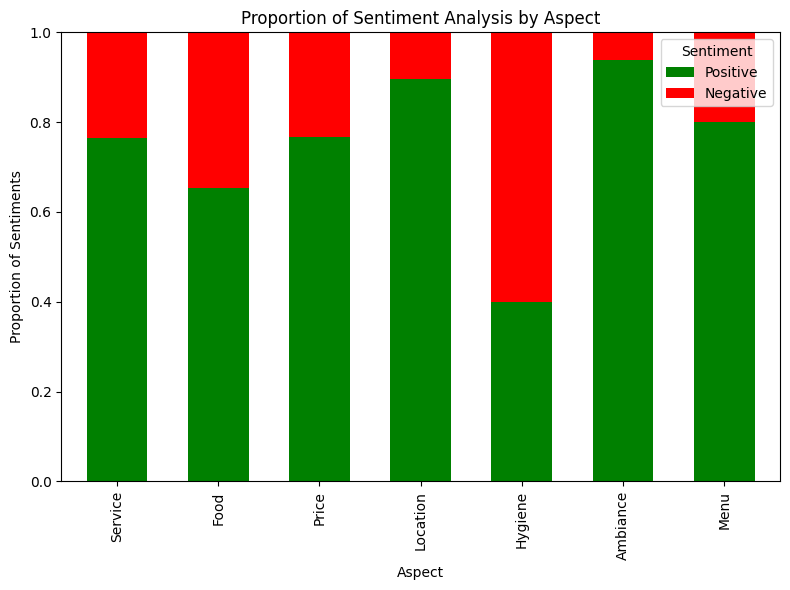

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
sentiment_df.plot(kind='bar', stacked=True, color=['green', 'red'], width=0.6, ax=ax)

# Labels and titles
plt.title('Proportion of Sentiment Analysis by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Proportion of Sentiments')
plt.ylim(0, 1)  # Ensure the y-axis goes from 0 to 1 for proportion visualization
plt.legend(title='Sentiment', labels=['Positive', 'Negative'])

plt.tight_layout()
plt.show()


<ipython-input-17-cfa98ca1afee>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Positive', 'Negative'], fontsize=12)
<ipython-input-17-cfa98ca1afee>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Positive', 'Negative'], fontsize=12)
<ipython-input-17-cfa98ca1afee>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Positive', 'Negative'], fontsize=12)
<ipython-input-17-cfa98ca1afee>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Positive', 'Negative'], fontsize=12)
<ipython-input-17-cfa98ca1afee>:16: UserWarning: set_ticklabels() should only be used with a fixed numbe

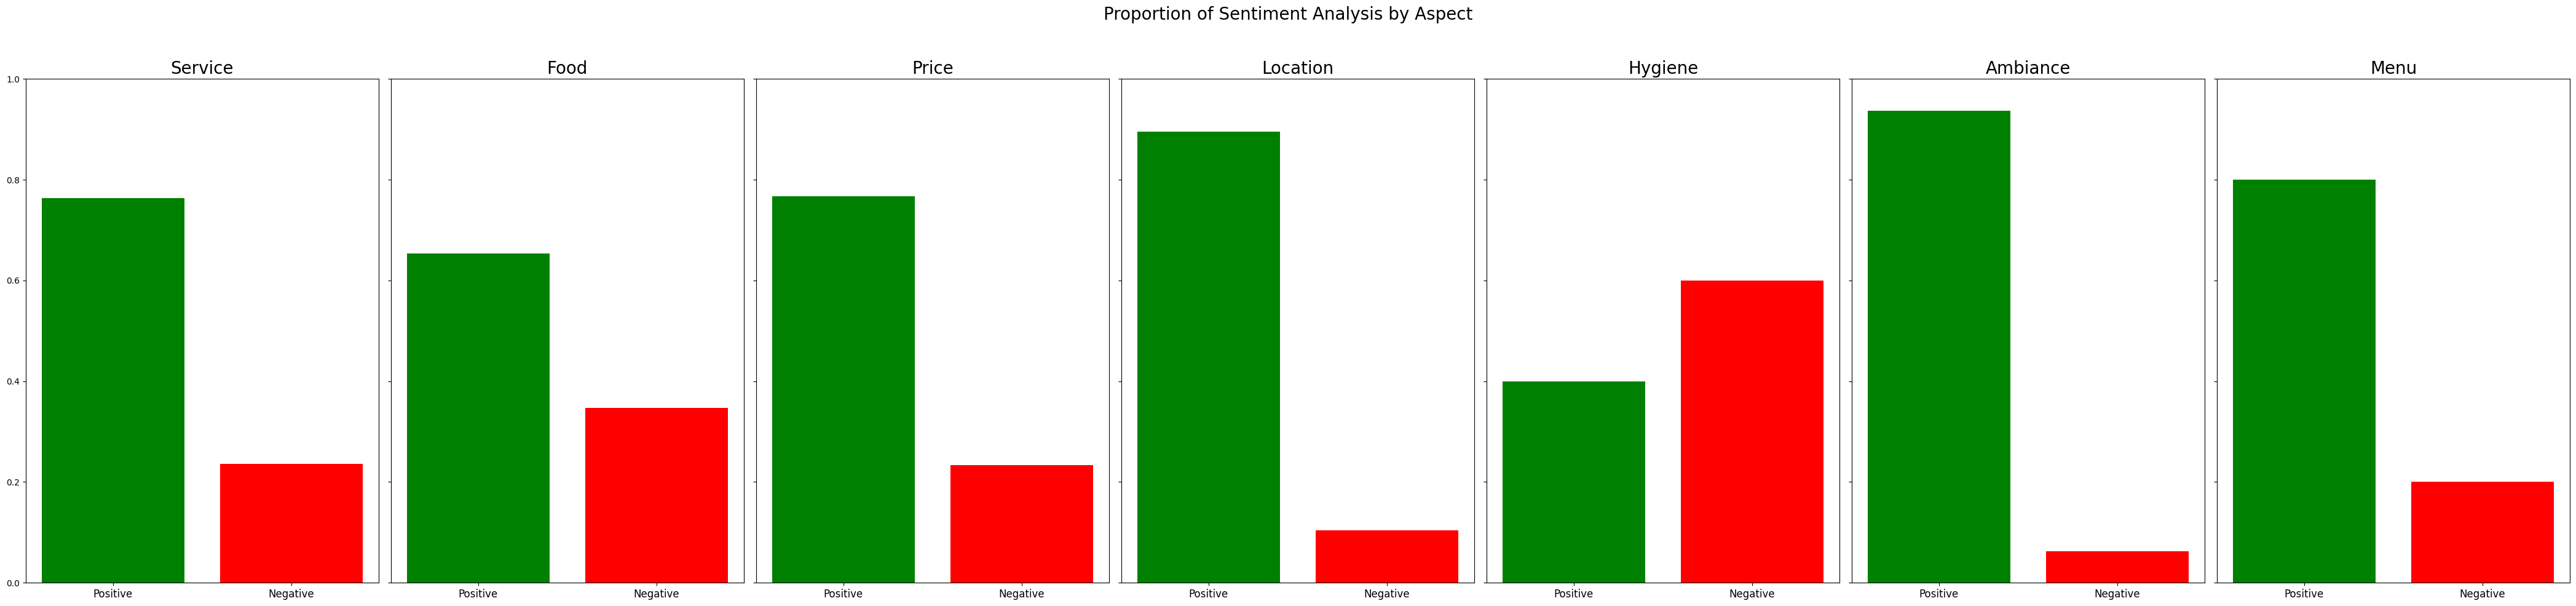

In [17]:
num_aspects = len(sentiment_df)

fig_width = num_aspects * 6
fig_height = 10

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=num_aspects, figsize=(fig_width, fig_height), sharey=True)

# Plot data on each subplot
for ax, (aspect, row) in zip(axes, sentiment_df.iterrows()):
    ax.bar(['Positive', 'Negative'], row, color=['green', 'red'])
    ax.set_title(aspect, fontsize=20)
    ax.set_ylim(0, 1)  # Ensure y-axis goes from 0 to 1
    ax.set_xticklabels(['Positive', 'Negative'], fontsize=12)

plt.suptitle('Proportion of Sentiment Analysis by Aspect', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()